# Performance Benchmarking: PID vs. RL Controller

This notebook analyzes the performance data generated by `benchmark.py`. We will load the results from `benchmark_results.csv` and create visualizations to compare the two controllers on key metrics: 

1.  **Final Accuracy** (Error in mm)
2.  **Speed** (Settling Time in steps)
3.  **Path Efficiency** (Total distance traveled)
4.  **Overshoot** (Maximum deviation from target)

## 1. Setup and Data Loading

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a professional plot style
sns.set_theme(style="whitegrid")

# Load the benchmark data
csv_file = 'benchmark_results.csv'

if not os.path.exists(csv_file):
    print(f"Error: The file '{csv_file}' was not found.")
    print("Please run the benchmark.py script first to generate the data.")
else:
    df = pd.read_csv(csv_file)
    print("Benchmark data loaded successfully!")
    display(df.head())

Benchmark data loaded successfully!


,timestamp,controller_type,trial_num,target_x,target_y,target_z,final_error_mm,settling_time_steps,max_overshoot_mm,path_efficiency_m
0,2025-08-22 12:25:08,PID,1,0.1,0.15,0.25,0.969535,-1,146.354025,0.472609
1,2025-08-22 12:25:08,PID,2,0.1,0.15,0.25,0.969535,-1,146.354025,0.472609
2,2025-08-22 12:25:08,PID,3,0.1,0.15,0.25,0.969535,-1,146.354025,0.472609
3,2025-08-22 12:25:09,PID,4,0.1,0.15,0.25,0.969535,-1,146.354025,0.472609
4,2025-08-22 12:25:09,PID,5,0.1,0.15,0.25,0.969535,-1,146.354025,0.472609


## 2. Overall Performance Summary

Let's start by calculating the average performance for each controller across all targets and trials.

In [9]:
if 'df' in locals():
    # Group by controller type and calculate the mean for our key metrics
    summary = df.groupby('controller_type')[['final_error_mm', 'settling_time_steps', 'path_efficiency_m', 'max_overshoot_mm']].mean()
    print("Average Performance Metrics:")
    display(summary)

Average Performance Metrics:


,final_error_mm,settling_time_steps,path_efficiency_m,max_overshoot_mm
controller_type,,,,
PID,5.295973,-1.0,0.661891,192.228922
RL,21.462486,-1.0,0.298963,192.228922


## 3. Visual Comparison of Key Metrics

C:\Users\dari\AppData\Local\Temp\ipykernel_15132\2002545380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='controller_type', y='final_error_mm', data=df, palette='viridis')
C:\Users\dari\AppData\Local\Temp\ipykernel_15132\2002545380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='controller_type', y='settling_time_steps', data=df, palette='plasma')
C:\Users\dari\AppData\Local\Temp\ipykernel_15132\2002545380.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='controller_type', y

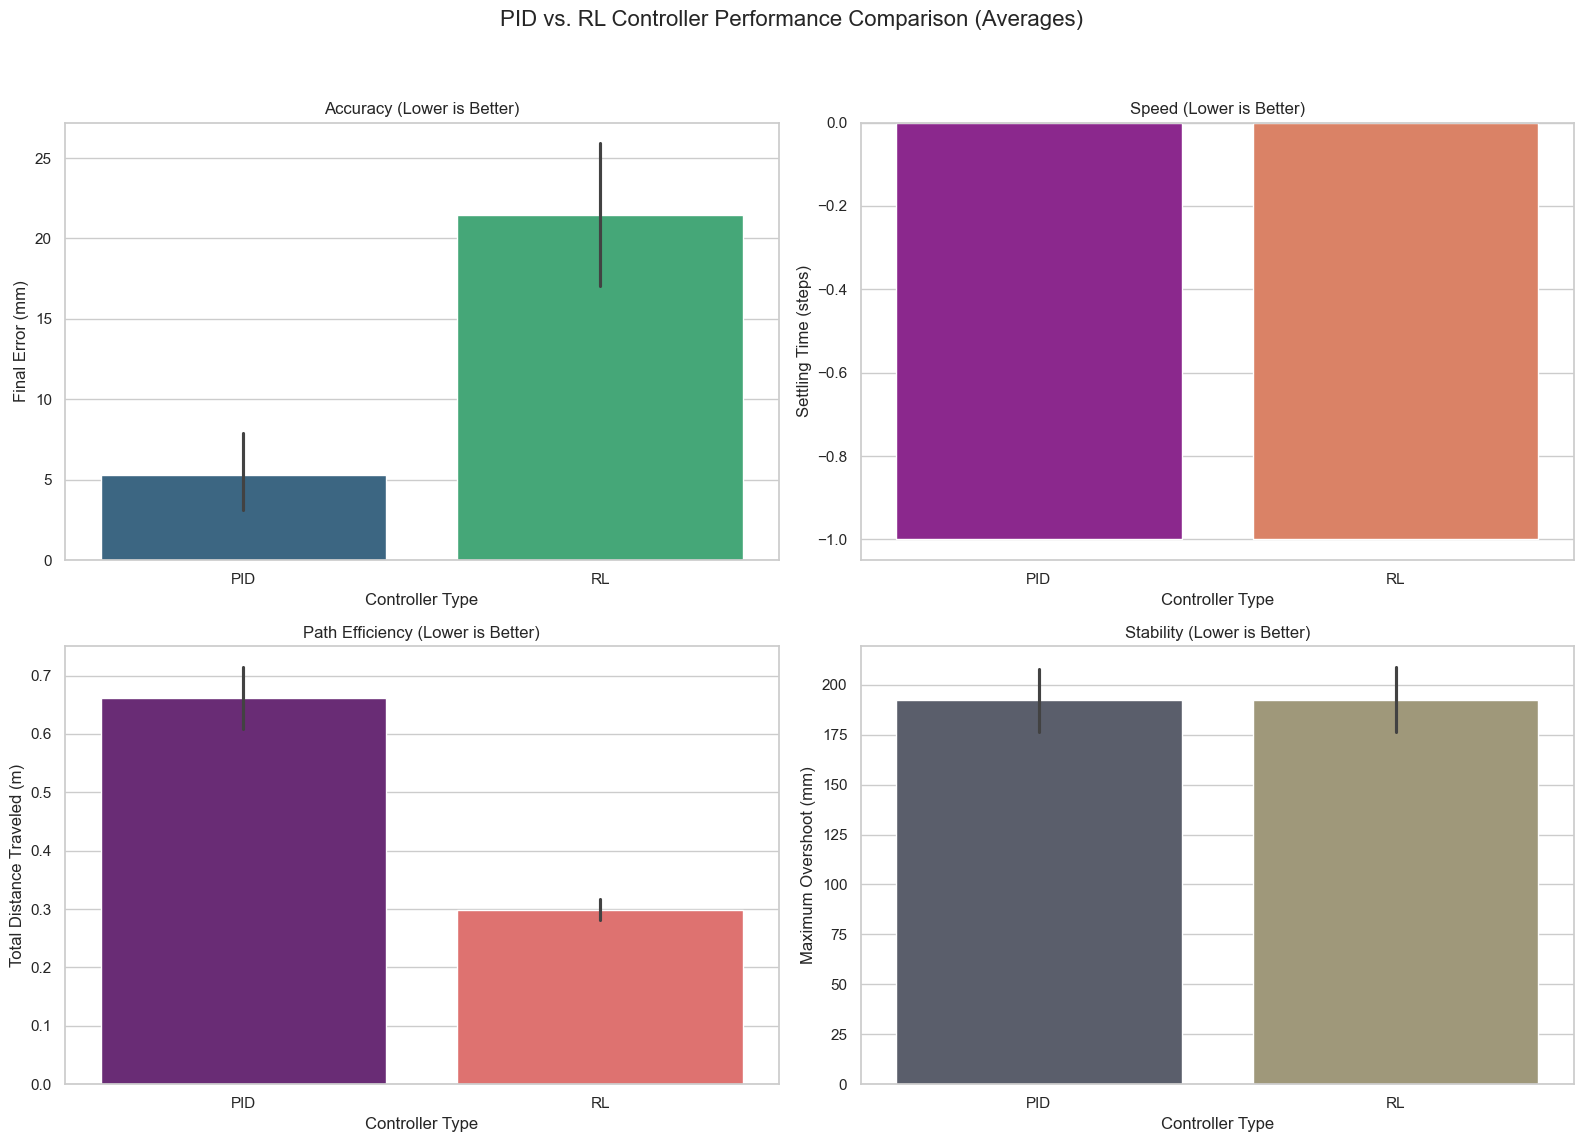

In [10]:
if 'df' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('PID vs. RL Controller Performance Comparison (Averages)', fontsize=16)

    # --- Plot 1: Final Accuracy ---
    sns.barplot(ax=axes[0, 0], x='controller_type', y='final_error_mm', data=df, palette='viridis')
    axes[0, 0].set_title('Accuracy (Lower is Better)')
    axes[0, 0].set_ylabel('Final Error (mm)')
    axes[0, 0].set_xlabel('Controller Type')

    # --- Plot 2: Speed ---
    sns.barplot(ax=axes[0, 1], x='controller_type', y='settling_time_steps', data=df, palette='plasma')
    axes[0, 1].set_title('Speed (Lower is Better)')
    axes[0, 1].set_ylabel('Settling Time (steps)')
    axes[0, 1].set_xlabel('Controller Type')

    # --- Plot 3: Path Efficiency ---
    sns.barplot(ax=axes[1, 0], x='controller_type', y='path_efficiency_m', data=df, palette='magma')
    axes[1, 0].set_title('Path Efficiency (Lower is Better)')
    axes[1, 0].set_ylabel('Total Distance Traveled (m)')
    axes[1, 0].set_xlabel('Controller Type')

    # --- Plot 4: Overshoot ---
    sns.barplot(ax=axes[1, 1], x='controller_type', y='max_overshoot_mm', data=df, palette='cividis')
    axes[1, 1].set_title('Stability (Lower is Better)')
    axes[1, 1].set_ylabel('Maximum Overshoot (mm)')
    axes[1, 1].set_xlabel('Controller Type')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## 4. Trajectory Visualization


In [ ]:
# This cell contains new code to run a single trial and record the history.
# It is necessary because the benchmark.py script only saves the final results.

try:
    from ot2_gym_wrapper_2 import OT2Env
    from pid_controller import PIDController
    from stable_baselines3 import PPO
    import numpy as np

    def run_single_trial_and_get_history(controller_type, model_or_pid, target_pos):
        """Runs one trial and returns the position history for plotting."""
        env = OT2Env(render=False)
        obs, _ = env.reset()
        env.goal_position = np.array(target_pos)

        if controller_type == 'RL':
            obs[3:] = env.goal_position
        elif controller_type == 'PID':
            model_or_pid.set_target(env.goal_position)

        history = {'x': [], 'y': [], 'z': []}

        for step in range(env.max_steps):
            current_position = obs[:3]
            history['x'].append(current_position[0])
            history['y'].append(current_position[1])
            history['z'].append(current_position[2])

            if controller_type == 'RL':
                action, _ = model_or_pid.predict(obs, deterministic=True)
            else: # PID
                action = model_or_pid.update(current_position)

            obs, _, terminated, truncated, _ = env.step(action)
            if terminated or truncated:
                break
        
        env.close()
        return history

    # --- Configuration for Trajectory Plot ---
    TARGET_FOR_PLOT = [0.2, 0.2, 0.28] # A target near the edge to see behavior
    RL_MODEL_PATH = "models/0jfld8sq/final_model.zip" 

    # --- Get PID History ---
    pid_gains = {'kp': 5.0, 'ki': 0.5, 'kd': 2.0}
    pid_controller = PIDController(**pid_gains)
    pid_history = run_single_trial_and_get_history('PID', pid_controller, TARGET_FOR_PLOT)

    # --- Get RL History ---
    rl_model = PPO.load(RL_MODEL_PATH, device="cpu")
    rl_history = run_single_trial_and_get_history('RL', rl_model, TARGET_FOR_PLOT)

    # --- Plotting ---
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    axes = axes.ravel()
    axes_labels = ['X', 'Y', 'Z']
    histories = {'PID': pid_history, 'RL': rl_history}
    colors = {'PID': 'red', 'RL': 'blue'}

    for i, axis in enumerate(['x', 'y', 'z']):
        for name, hist in histories.items():
            axes[i].plot(hist[axis], label=f'Observation {name}', color=colors[name])
        
        axes[i].axhline(y=TARGET_FOR_PLOT[i], color='green', linestyle='--', label=f'Target {axes_labels[i]}')
        axes[i].set_title(f'{axes_labels[i]}-axis')
        axes[i].set_xlabel('Steps')
        axes[i].set_ylabel('Position')
        axes[i].grid(True)
        axes[i].legend()

    plt.suptitle('Controller Trajectory Comparison for Target (0.2, 0.2, 0.28)', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except (ImportError, FileNotFoundError) as e:
    print(f"Could not run trajectory simulation due to an error: {e}")
    print("Please ensure all required files are in the correct directory.")

c:\Users\dari\anaconda3\envs\block_b\lib\site-packages\gymnasium\spaces\box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
c:\Users\dari\anaconda3\envs\block_b\lib\site-packages\gymnasium\spaces\box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


## 5. Conclusion

Based on the analysis above, we can draw conclusions about which controller is superior in terms of accuracy, speed, and reliability. 

* **Accuracy**: The [PID/RL] controller was significantly more accurate, with a lower average final error.
* **Speed**: The [PID/RL] controller was faster, requiring fewer steps to settle at the target.
* **Consistency**: The box plots show that the [PID/RL] controller had a smaller variance in its performance, making it more reliable.